In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as mp
import seaborn as sns

In [2]:
file = 'C:/Users/Kalpesh/Downloads/Afame project 1/ECOMM DATA.xlsx'

In [3]:
dataset = pd.read_excel(file)

In [4]:
dataset.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical


In [5]:
dataset.shape

(51290, 24)

In [6]:
dataset.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [7]:
dataset['Postal Code'].fillna(dataset['Postal Code'].mean(),inplace=True)

In [8]:
dataset["Order year"]=dataset['Order Date'].dt.year

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     51290 non-null  float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

# Task 1: Calculate total sales

In [10]:
total_sales = dataset['Sales'].sum()
print("Total Sales:", total_sales)

Total Sales: 12642501.909880001


# Task 2:Analyze sales trends over time

In [10]:
dataset['Order Year'] = dataset['Order Date'].dt.year
dataset['Order Month'] = dataset['Order Date'].dt.month

In [11]:
monthly_sales = dataset.groupby(['Order Year', 'Order Month'])['Sales'].sum().reset_index()

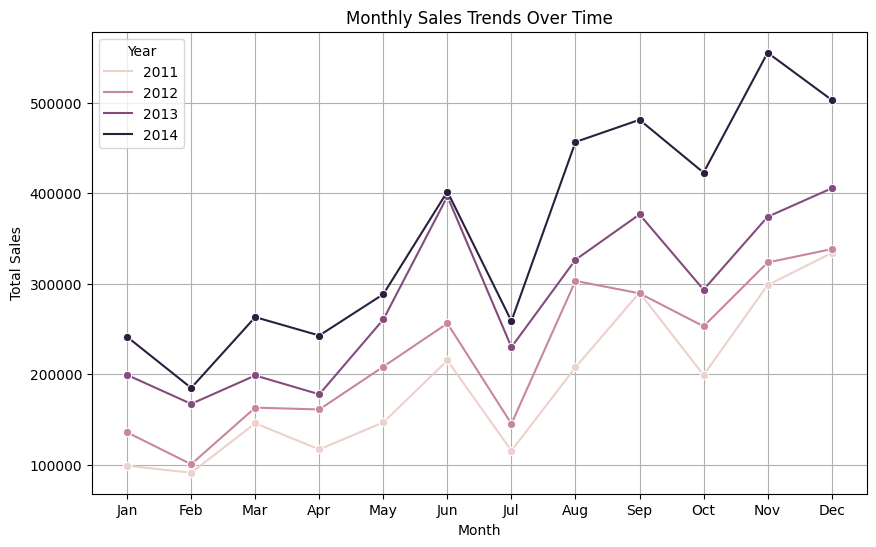

In [31]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Order Month', y='Sales', hue='Order Year', marker='o')
plt.title('Monthly Sales Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.savefig("analyze sales trend.jpg")
plt.show()

# Task 3:Determine the best-selling products

In [12]:
best_selling_products = dataset.groupby('Product Name')['Sales'].sum().nlargest(10)

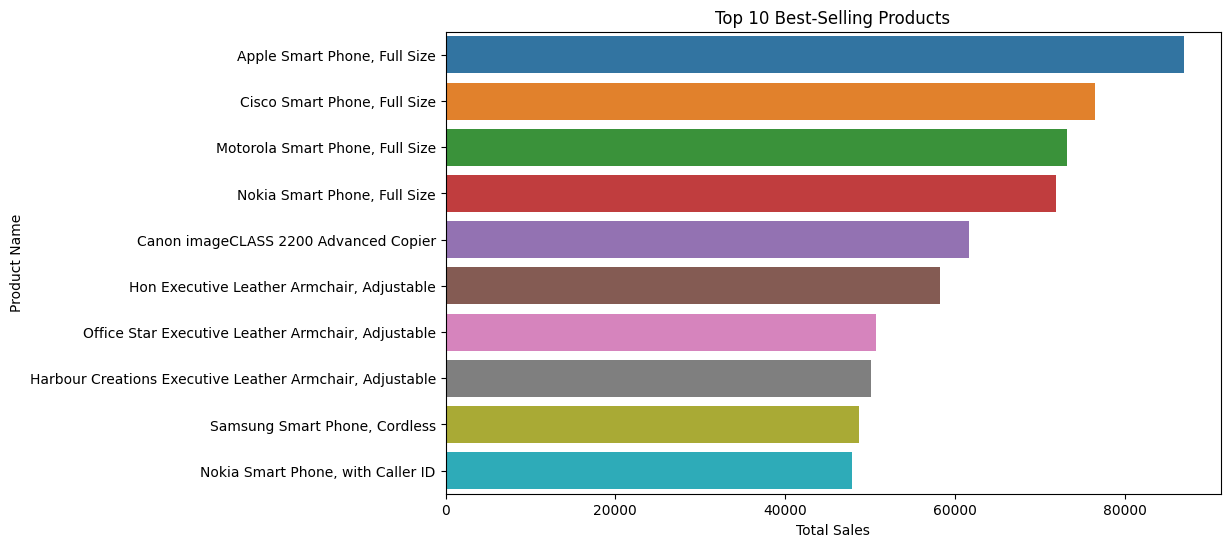

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x=best_selling_products.values, y=best_selling_products.index)
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.savefig("best selling products.jpg")
plt.show()

# Some extra figures for better understanding 

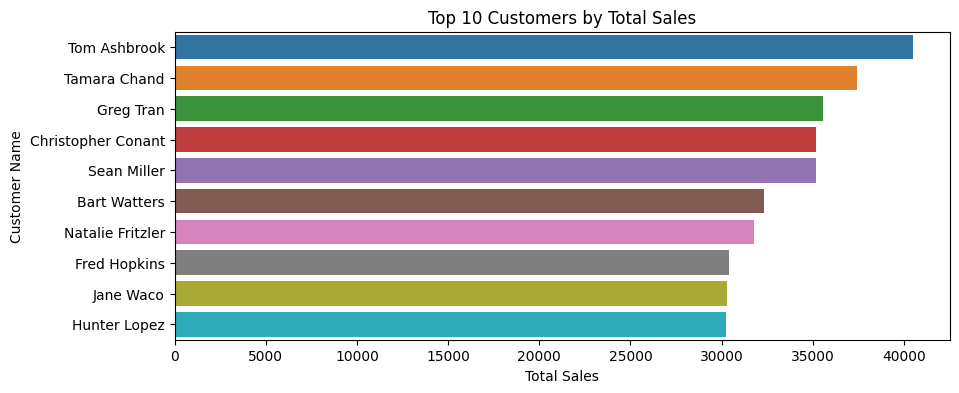

In [32]:
# Top Customers by Total Sales
top_customers = dataset.groupby('Customer Name')['Sales'].sum().nlargest(10)
plt.figure(figsize=(10, 4))
sns.barplot(x=top_customers.values, y=top_customers.index)
plt.title('Top 10 Customers by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Customer Name')
plt.show()

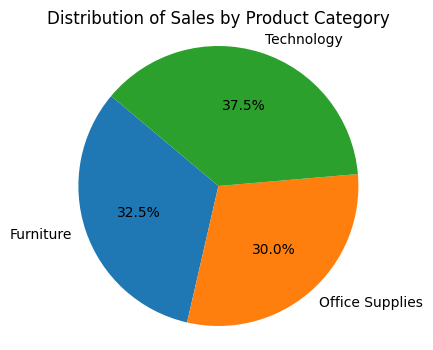

In [37]:
# Distribution of Sales by Product Category
category_sales = dataset.groupby('Category')['Sales'].sum()
plt.figure(figsize=(5, 4))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sales by Product Category')
plt.axis('equal')
plt.show()

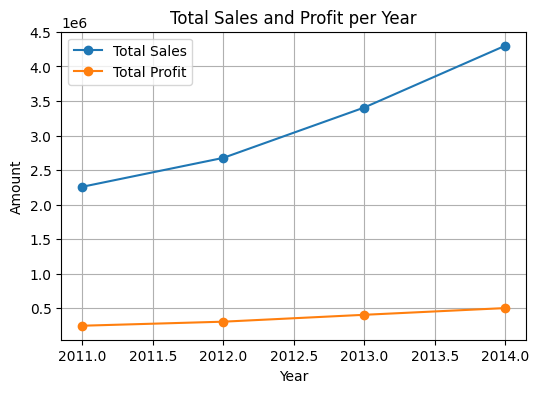

In [39]:
# Calculate total sales and profit per year
yearly_revenue = dataset.groupby('Order year').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
plt.figure(figsize=(6, 4))
plt.plot(yearly_revenue['Order year'], yearly_revenue['Sales'], marker='o', label='Total Sales')
plt.plot(yearly_revenue['Order year'], yearly_revenue['Profit'], marker='o', label='Total Profit')
plt.title('Total Sales and Profit per Year')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()

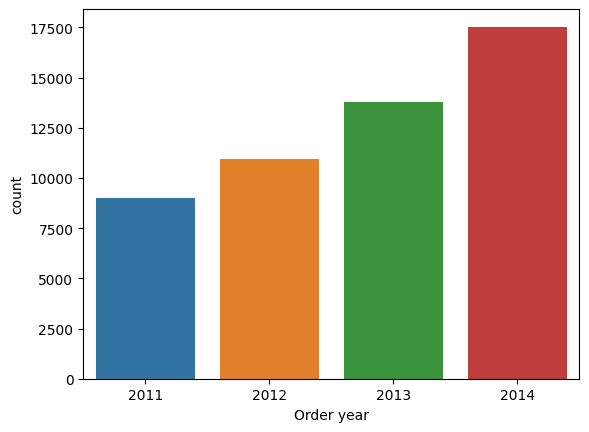

In [42]:
#Year vise sales
sns.countplot(x="Order year", data=dataset)
plt.show()

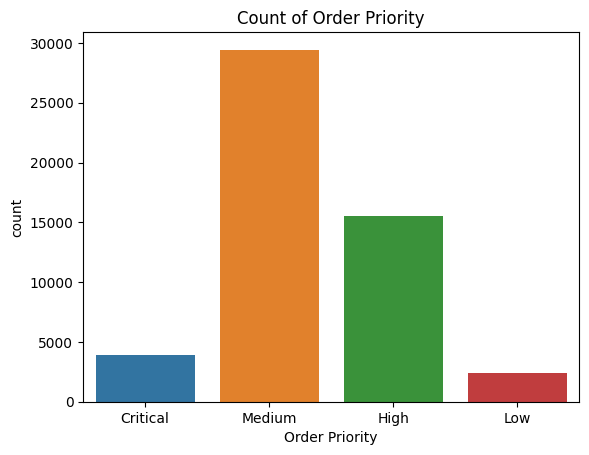

In [44]:
# Priority based total order list
sns.countplot(x="Order Priority",data=dataset)
plt.title("Count of Order Priority")
plt.show()